title

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Load ETOPO1 data
file = '/Users/spv2023/MGWR_datasets/inputs/etopo1_MC.nc'  # Replace with your file path
ds = xr.open_dataset(file)

# Extract bathymetry data
bathy = ds.B_BATHY
lon = ds.LON16201_20401; lat = ds.LAT4201_6601

print(ds['B_BATHY'].values.shape)
bathy = np.squeeze(bathy)
print(bathy.values.shape)

(1, 2401, 4201)
(2401, 4201)


/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:240: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


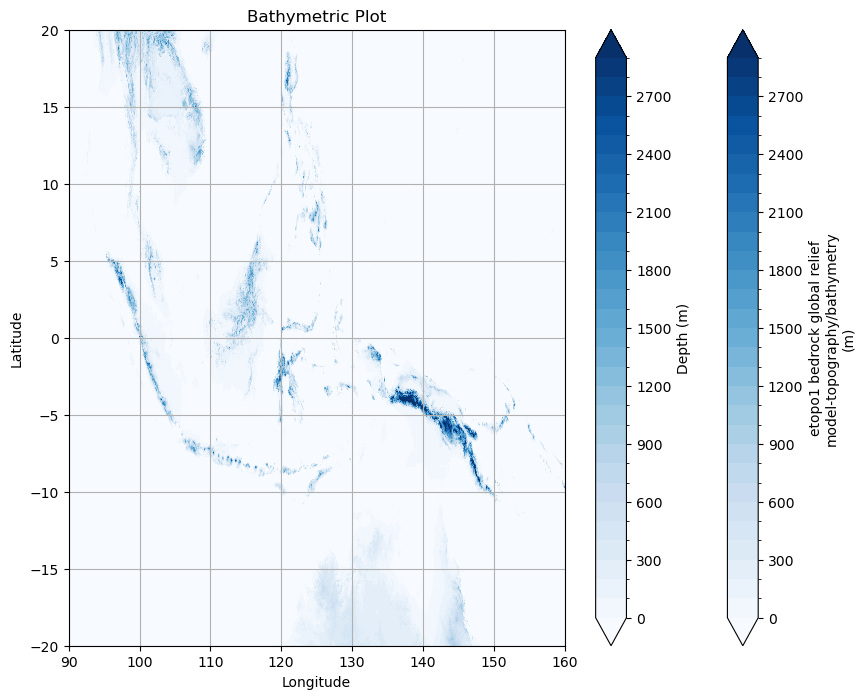

In [3]:

# Define levels for contour plotting
levels = np.arange(0, 3000, 100)  # Adjust range and interval as per your data

# Plotting the bathymetric data
plt.figure(figsize=(10, 8))
contour_plot = bathy.plot(levels=levels, cmap='Blues')  # Store the plot object
plt.colorbar(contour_plot, label='Depth (m)')
plt.title('Bathymetric Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


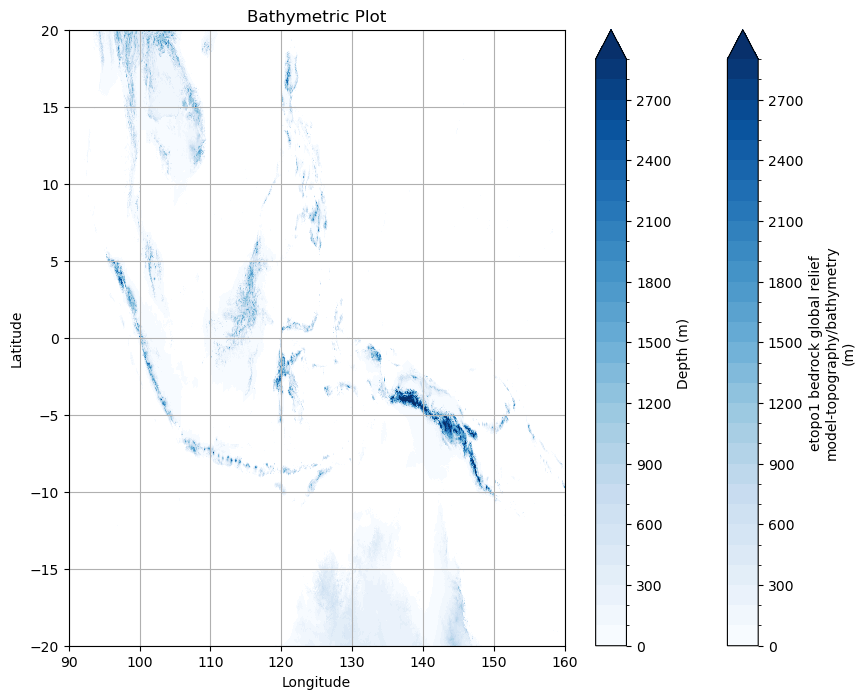

In [4]:
# Define latitude and longitude bounds for the Maritime Continent
lon_min, lon_max = 90, 160
lat_min, lat_max = 10, -11

# Create a mask selecting data within the region
#maritime_continent_mask = (ds['LON16201_20401'] >= lon_min) & (ds['LON16201_20401'] <= lon_max) & \
#                            (ds['LAT4201_6601'] >= lat_min) & (ds['LAT4201_6601'] <= lat_max) & \
#                            (ds['B_BATHY'] >= 0)

maritime_continent_mask = (ds['B_BATHY'] >= 0)

# Select data for the Maritime Continent
mc_bathy = bathy.where(maritime_continent_mask)
#mc_slope = slope.where(maritime_continent_mask)

mc_bathy = bathy.where(maritime_continent_mask)
#mc_slope = slope.where(maritime_continent_mask)


# Define levels for contour plotting
levels = np.arange(0, 3000, 100)  # Adjust range and interval as per your data

# Plotting the bathymetric data
plt.figure(figsize=(10, 8))
contour_plot = mc_bathy.plot(levels=levels, cmap='Blues')  # Store the plot object
plt.colorbar(contour_plot, label='Depth (m)')
plt.title('Bathymetric Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

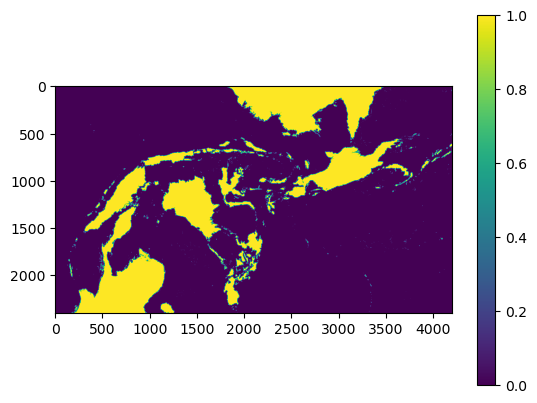

In [5]:
plt.imshow(np.squeeze(maritime_continent_mask))
plt.colorbar()
plt.show()

In [6]:
# Calculate slope in latitude (y) and longitude (x)
slope_x = bathy.differentiate('LON16201_20401')  # Replace 'lon' with your longitude coordinate name
slope_y = bathy.differentiate('LAT4201_6601')  # Replace 'lat' with your latitude coordinate name


/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/copy.py:265: CFWarning: this date/calendar/year zero convention is not supported by CF
  y = func(*args)


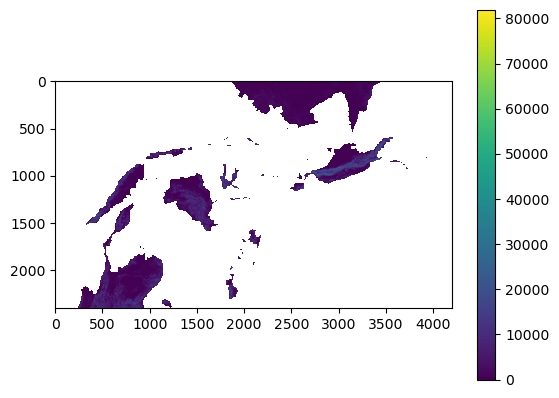

In [8]:

# Calculate the 2D slope
slope = np.sqrt(slope_x**2 + slope_y**2)
slope = np.squeeze(slope)

# Plot the slope
#import matplotlib.pyplot as plt
#plt.imshow(slope)
#plt.colorbar()
#plt.show()

#slope_x_da = xr.DataArray(slope_x, dims=bathy.dims, coords=bathy.coords)
#slope_y_da = xr.DataArray(slope_y, dims=bathy.dims, coords=bathy.coords)

slope = xr.DataArray(slope)
slope_mc = slope.where(maritime_continent_mask)
#slope = np.squeeze(slope)  # This will remove the first dimension if it's 1

plt.imshow(slope_mc)
plt.colorbar()
plt.show()




Method 2

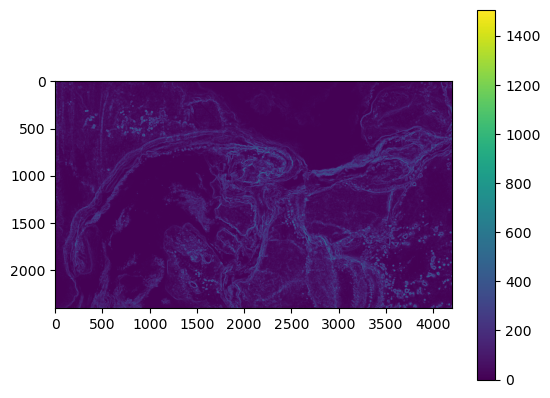

In [53]:
# Calculate gradients using np.gradient
slope = np.gradient(bathy.values, axis=(0, 1))  # Adjust axes depending on your data shape
slope_x = slope[1]  # Gradient in x direction
slope_y = slope[0]  # Gradient in y direction

# Calculate the 2D slope
slope = np.sqrt(slope_x**2 + slope_y**2)
slope = np.squeeze(slope)
# Plot the slope
#import matplotlib.pyplot as plt
#plt.imshow(slope)
#plt.colorbar()
#plt.show()

#slope_x_da = xr.DataArray(slope_x, dims=bathy.dims, coords=bathy.coords)
#slope_y_da = xr.DataArray(slope_y, dims=bathy.dims, coords=bathy.coords)

slope = xr.DataArray(slope)

#slope = np.squeeze(slope)  # This will remove the first dimension if it's 1

plt.imshow(slope)
plt.colorbar()
plt.show()



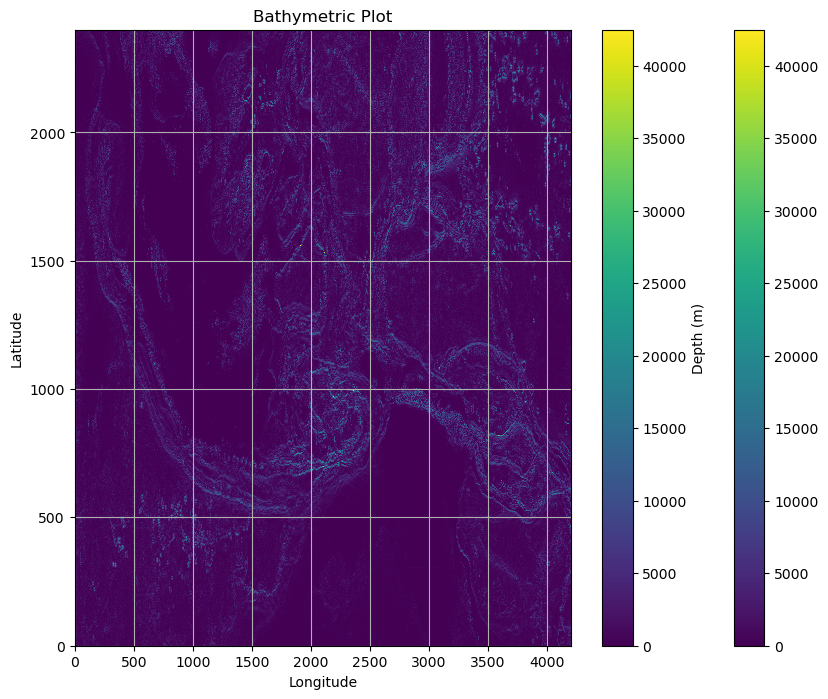

In [31]:
# Plotting the bathymetric data
plt.figure(figsize=(10, 8))
contour_plot = slope.plot()  # Store the plot object
plt.colorbar(contour_plot, label='Depth (m)')
plt.title('Bathymetric Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:

# Load rainfall data (replace with your rainfall data file)
rainfall_data = xr.open_dataset('/Users/spv2023/MGWR_datasets/inputs/rainfall_data.nc')

# Apply mask to rainfall data
mc_rainfall = rainfall_data.where(maritime_continent_mask)

# Extract time series for mountainous and planar regions (adjust thresholds as needed)
mountain_threshold = 2000  # Meters
mountain_rainfall = mc_rainfall.where(mc_slope >= mountain_threshold)
planar_rainfall = mc_rainfall.where(mc_slope < mountain_threshold)

# Average rainfall over mountainous and planar regions (adjust dimensions if needed)
mountain_ts = mountain_rainfall.mean(dim=('latitude', 'longitude'))
planar_ts = planar_rainfall.mean(dim=('latitude', 'longitude'))

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(mountain_ts.time, mountain_ts, label='Mountainous Region')
plt.plot(planar_ts.time, planar_ts, label='Planar Region')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.title('Rainfall Time Series')
plt.grid(True)
plt.show()

# Perform spectral analysis (adjust parameters as needed)
from scipy.signal import fft

mountain_fft = np.abs(fft(mountain_ts.values))
planar_fft = np.abs(fft(planar_ts.values))

# Plot frequency spectra
plt.figure(figsize=(12, 6))
plt.plot(mountain_fft, label='Mountainous Region')
plt.plot(planar_fft, label='Planar Region')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Frequency Spectrum')
plt.grid(True)

plt.show()